In [37]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# stocks to visualize and forecast
stock = 'GOOGL'

# fetch stock data for previous year
stockData = yf.download(tickers=stock, start = '2022-07-17', end = '2023-07-17')
stockData.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,112.639999,113.680000,108.370003,109.029999,109.029999,43164600
2022-07-19,110.849998,114.019997,109.559998,113.809998,113.809998,36530900
2022-07-20,113.169998,115.400002,112.480003,113.900002,113.900002,35600400
2022-07-21,114.279999,114.550003,111.110001,114.339996,114.339996,32676200
2022-07-22,111.000000,112.339996,106.500000,107.900002,107.900002,48901200


Visualize Stock

Text(0, 0.5, 'Prices ($)')

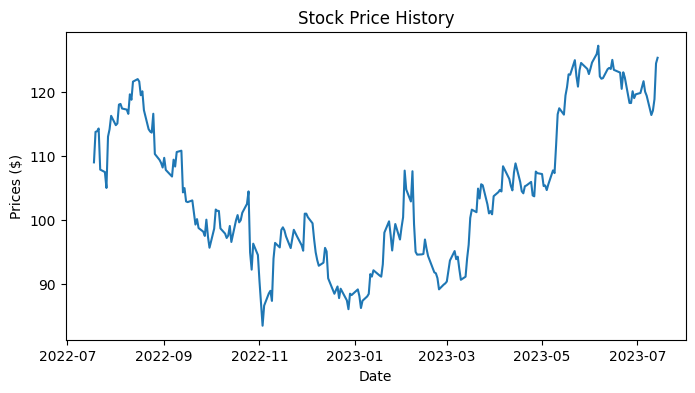

In [38]:
plt.figure(figsize=(8, 4))
plt.title('Stock Price History')
plt.plot(stockData['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Forecast Stock Price

In [ ]:
# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(stockData['Close'])

# split into sequences
sequenceLength = 365
sequences = []

for i in range(len(stockData) - sequenceLength):
    sequence = stockData['Close'].values[i:i + sequenceLength + 1]
    sequences.append(sequence)

# convert sequences to numpy array
sequences = np.array(sequences)

# train-test split
splitRatio = 0.8
splitIndex = int(splitRatio * len(sequences))

trainData = sequences[:splitIndex]
testData = sequences[splitIndex:]

X_train = trainData[:, :-1]
y_train = trainData[:, -1]

# reshape
nFeatures = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], nFeatures)

# LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], nFeatures)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

# train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# evaluate model
X_test = testData[:, :-1]
y_test = testData[:, -1]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], nFeatures)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# predict future stock price
prediction = scaler.inverse_transform(model.predict(stockData))

Visualize Prediction

In [ ]:
plt.plot(prediction, label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Price')
plt.legend()
plt.show()